# Analysis of US College data from 1995 issue of US News and World Report

First, let's look at what the data represents

In [1]:
?ISLR::College

College {ISLR},R Documentation


Load the data

In [2]:
college <- read.csv('College.csv')
head(college, 2)

X,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56


Use first column as index for the colleges.

In [3]:
rownames(college) <- college[, 1]
head(college, 2)

,X,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56


Now, remove the original column containing the college names, as it is now stored in index.

In [4]:
college <- college[, -1]
head(college, 2)

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56


---

## Data Analysis

Change the height of generated plots

In [5]:
options(repr.plot.height=5.5)    

In [6]:
summary(college)

 Private        Apps           Accept          Enroll       Top10perc    
 No :212   Min.   :   81   Min.   :   72   Min.   :  35   Min.   : 1.00  
 Yes:565   1st Qu.:  776   1st Qu.:  604   1st Qu.: 242   1st Qu.:15.00  
           Median : 1558   Median : 1110   Median : 434   Median :23.00  
           Mean   : 3002   Mean   : 2019   Mean   : 780   Mean   :27.56  
           3rd Qu.: 3624   3rd Qu.: 2424   3rd Qu.: 902   3rd Qu.:35.00  
           Max.   :48094   Max.   :26330   Max.   :6392   Max.   :96.00  
   Top25perc      F.Undergrad     P.Undergrad         Outstate    
 Min.   :  9.0   Min.   :  139   Min.   :    1.0   Min.   : 2340  
 1st Qu.: 41.0   1st Qu.:  992   1st Qu.:   95.0   1st Qu.: 7320  
 Median : 54.0   Median : 1707   Median :  353.0   Median : 9990  
 Mean   : 55.8   Mean   : 3700   Mean   :  855.3   Mean   :10441  
 3rd Qu.: 69.0   3rd Qu.: 4005   3rd Qu.:  967.0   3rd Qu.:12925  
 Max.   :100.0   Max.   :31643   Max.   :21836.0   Max.   :21700  
   Room.Board

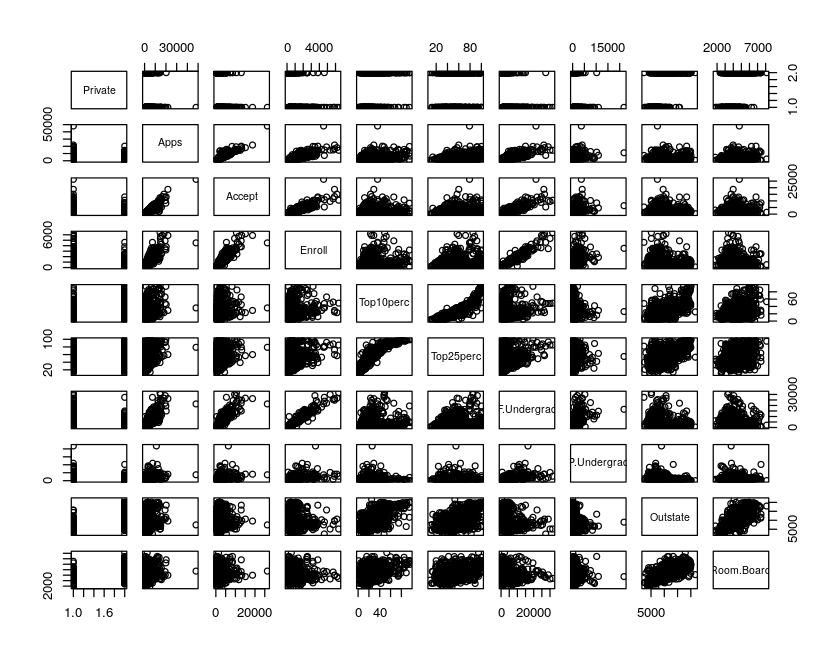

In [7]:
pairs(college[, 1:10])

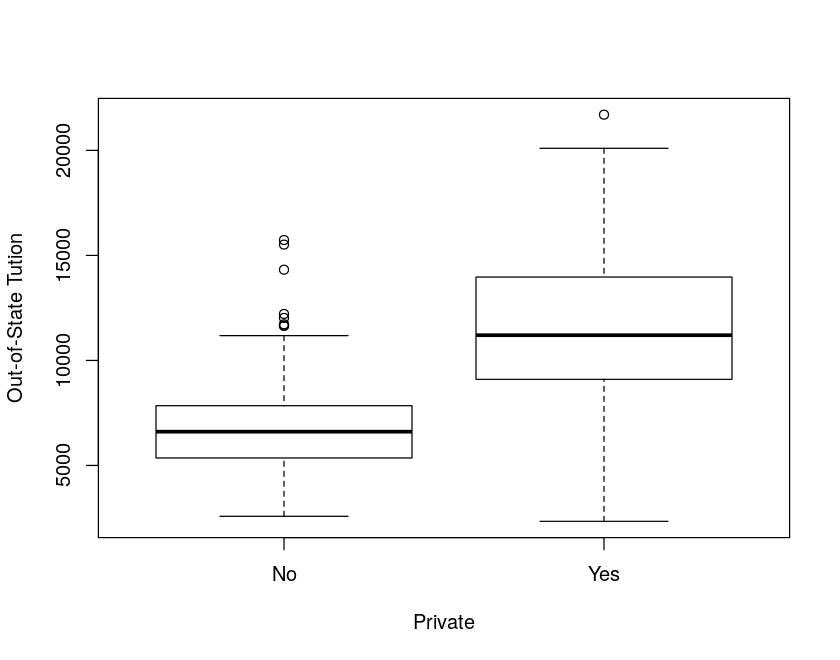

In [8]:
plot(college$Private, college$Outstate, 
     xlab="Private", ylab="Out-of-State Tution")

### Creating new qualitative variable `Elite`

In [9]:
Elite <- rep('No', nrow(college))
Elite[college$Top10perc > 50] = 'Yes'
Elite <- as.factor(Elite)
college <- data.frame(college, Elite)

head(college)

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Elite
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,No
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,No
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,No
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,Yes
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,No
Albertson College,Yes,587,479,158,38,62,678,41,13500,3335,500,675,67,73,9.4,11,9727,55,No


In [10]:
summary(Elite)

No Yes 
699  78

### Histograms

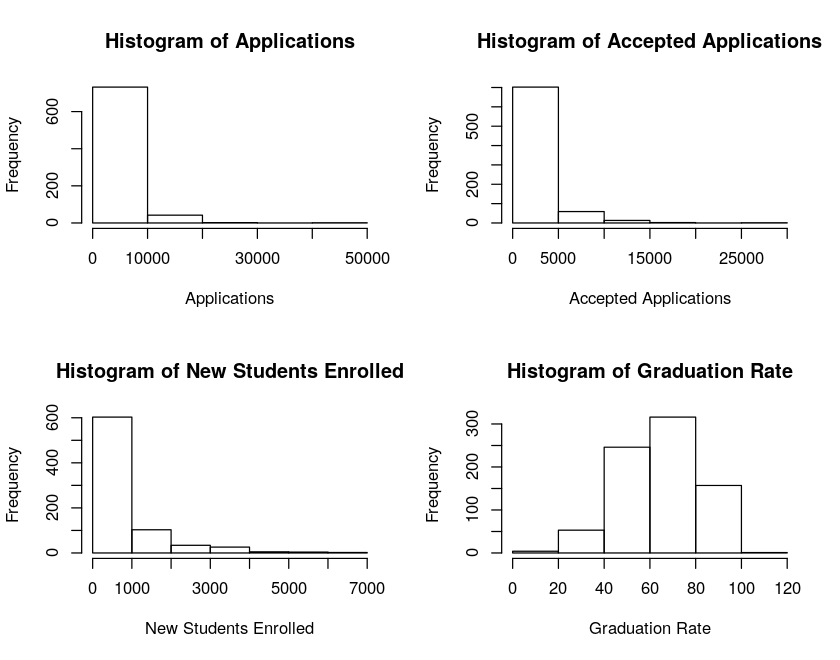

In [11]:
par(mfrow=c(2, 2))

hist(college$Apps,
     breaks=6,
     xlab='Applications',
     main='Histogram of Applications')

hist(college$Accept,
     breaks=6,
     xlab='Accepted Applications',
     main='Histogram of Accepted Applications')

hist(college$Enroll,
     breaks=6,
     xlab='New Students Enrolled',
     main='Histogram of New Students Enrolled')

hist(college$Grad.Rate,
     breaks=6,
     xlab='Graduation Rate',
     main='Histogram of Graduation Rate')


par(mfrow=c(1, 1))

---

## Extra Analysis

Check the relationship between the number of applications received and the college type

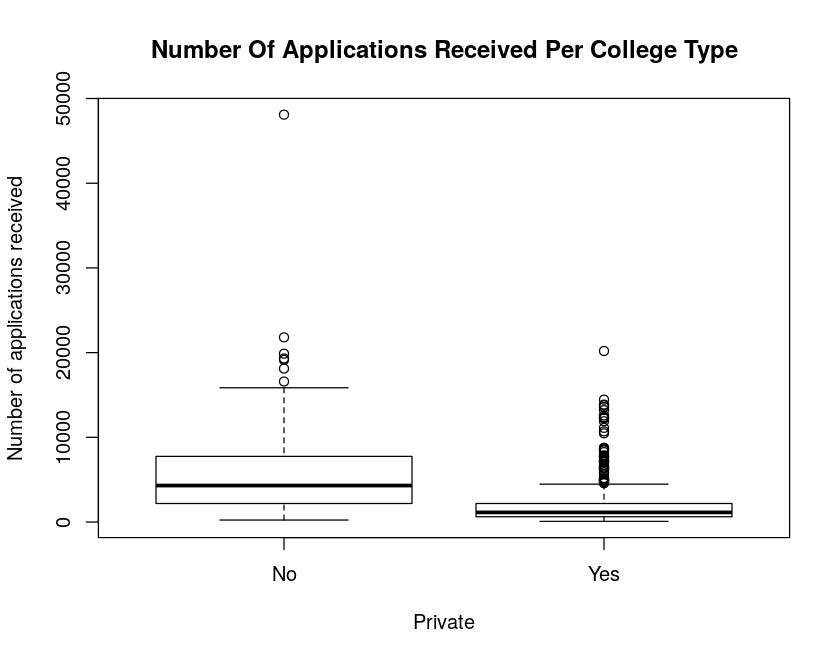

In [12]:
plot(college$Private, college$Apps, xlab='Private', ylab='Number of applications received',
     main='Number Of Applications Received Per College Type')

> Number of applications received in public colleges is very large as compared to private colleges.

Check the relationship between the number of students enrolled and the college type

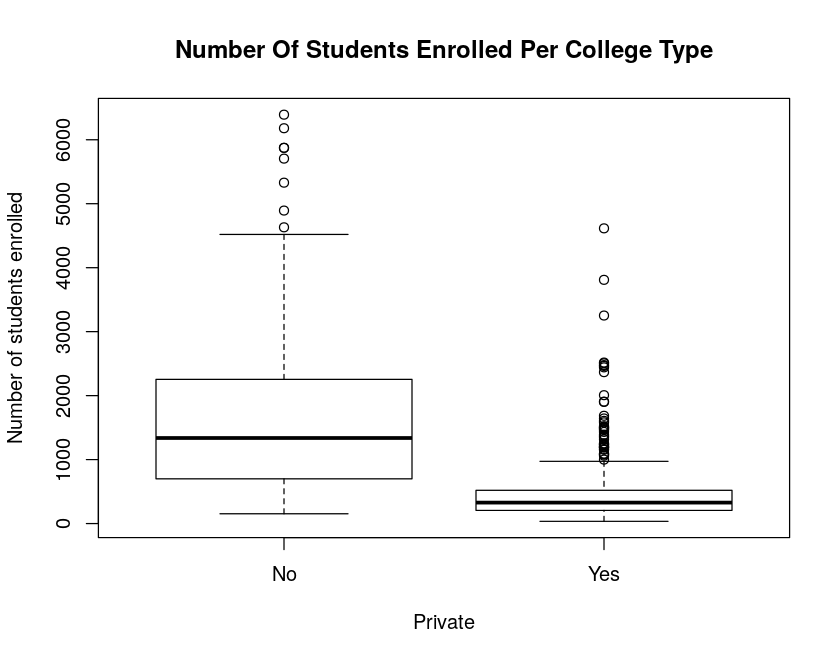

In [13]:
plot(college$Private, college$Enroll, xlab='Private', ylab='Number of students enrolled',
     main='Number Of Students Enrolled Per College Type')

> Number of students enrolled in public colleges is very large as compared to private colleges.

> **As it is evident from the plots, the reason that the number of enrollments in public colleges is very large as compared to private colleges is that public colleges receive a large number of applications.**

Let's check if there is any relationship between the number of new students enrolled and the number of fulltime/parttime undergraduates

In [14]:
summary(college[, c('F.Undergrad', 'P.Undergrad')])

  F.Undergrad     P.Undergrad     
 Min.   :  139   Min.   :    1.0  
 1st Qu.:  992   1st Qu.:   95.0  
 Median : 1707   Median :  353.0  
 Mean   : 3700   Mean   :  855.3  
 3rd Qu.: 4005   3rd Qu.:  967.0  
 Max.   :31643   Max.   :21836.0  

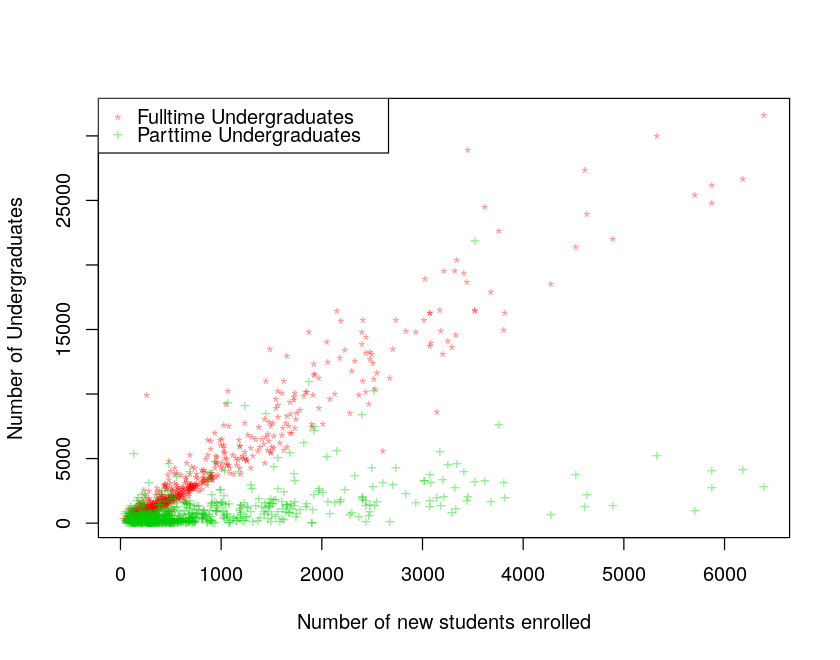

In [15]:
plot(college$Enroll, college$F.Undergrad, xlab='Number of new students enrolled', ylab='Number of Undergraduates', col=adjustcolor(2, .4), pch='*')
points(college$Enroll, college$P.Undergrad, col=adjustcolor(3, .4), pch='+')

legend('topleft', c('Fulltime Undergraduates', 'Parttime Undergraduates'), col=adjustcolor(c(2, 3), .4), pch=c('*', '+'))

> There doesn't seem to be any pattern present between the number of students enrolled and number of fulltime/parttime undergratuates.

Check the relationship between Top-10-Percent and Graduation Rate

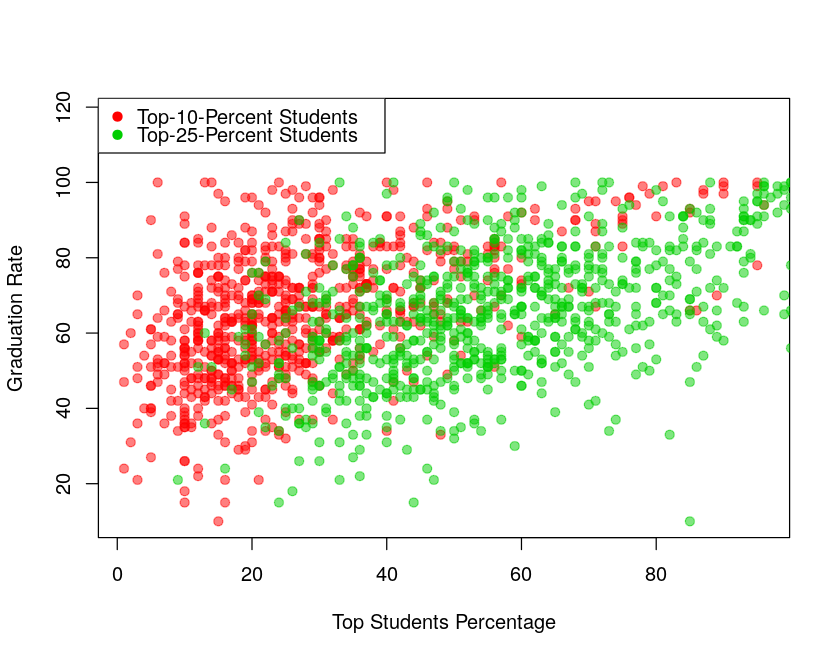

In [16]:
plot(college$Top10perc, college$Grad.Rate, xlab='Top Students Percentage', ylab='Graduation Rate', col=adjustcolor(2, .5), pch=19)
points(college$Top25perc, college$Grad.Rate, col=adjustcolor(3, .5), pch=19)

legend('topleft', c('Top-10-Percent Students', 'Top-25-Percent Students'), pch=19, col=c(2, 3))

> The plot shows a relationship between Top-10-percent student percentage and the graduation rate: A higher Top-10-percent rate always ensures a higher graduation rate.

Check the relationship between College type and Student-Faculty Ratio

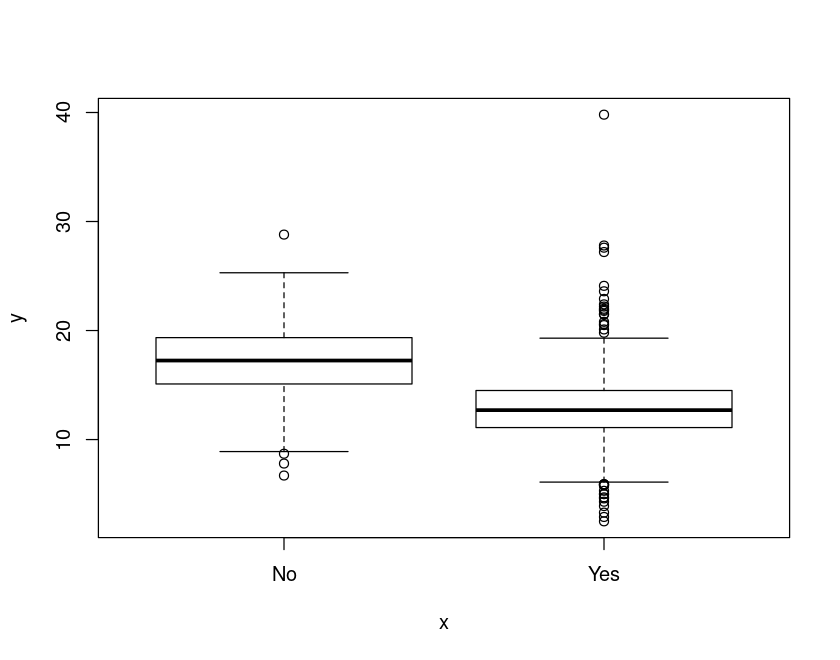

In [17]:
plot(college$Private, college$S.F.Ratio)

> Private college have a better Student-Faculty ratio.

Check the relationship between College type and Graduation Rate

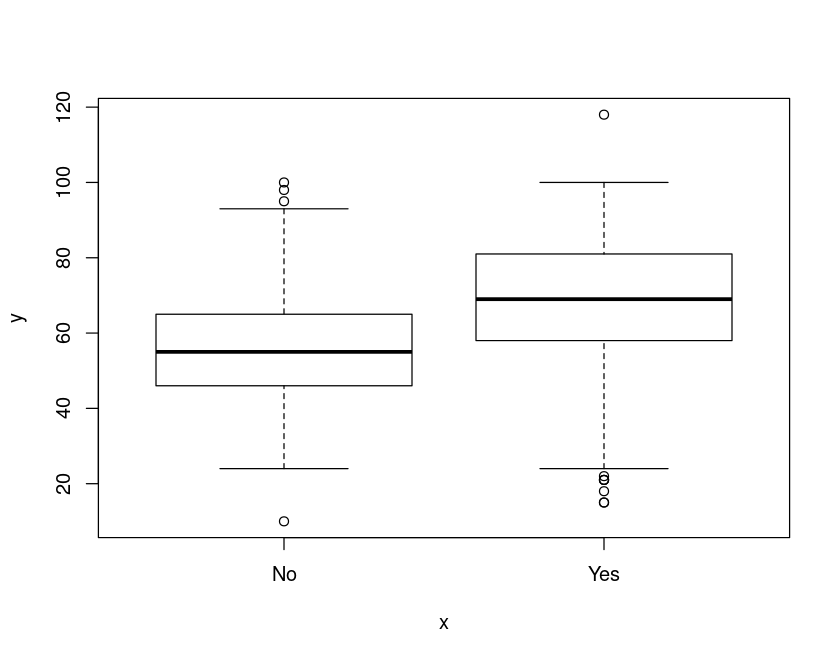

In [18]:
plot(college$Private, college$Grad.Rate)

> Private colleges have a better graduation rate.

Check the relationship between College type and Percentage of Faculty with Ph.D

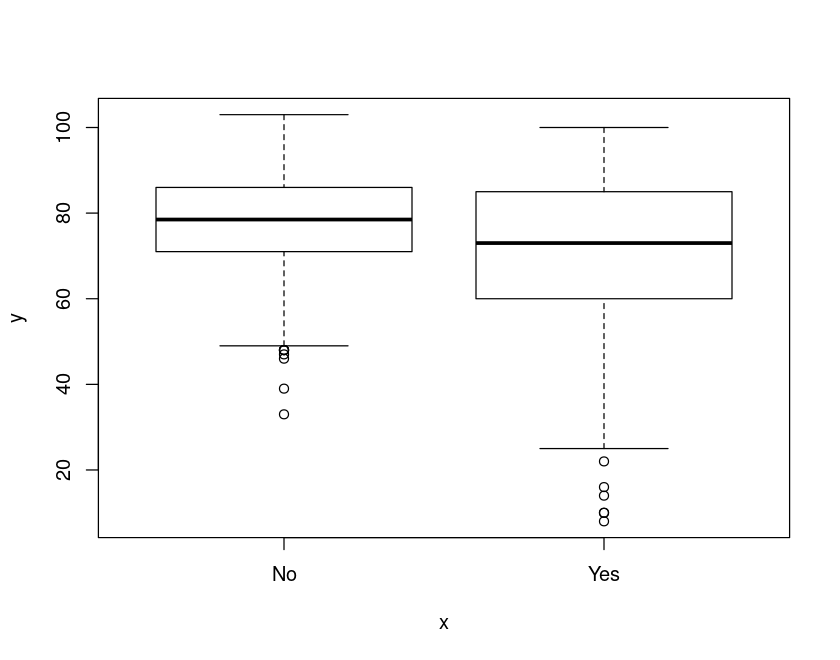

In [19]:
plot(college$Private, college$PhD)

> Public colleges have a slightly more percentage of Faculty with Ph.Ds

> **Although public colleges have a higher percentage of faculty with Ph.Ds, the graduation rate for private colleges is higher. The reason for this could be the fact that private colleges have a better student-faculty ratio.**

Check the relationship between College type and Percentage of Alumni who donate

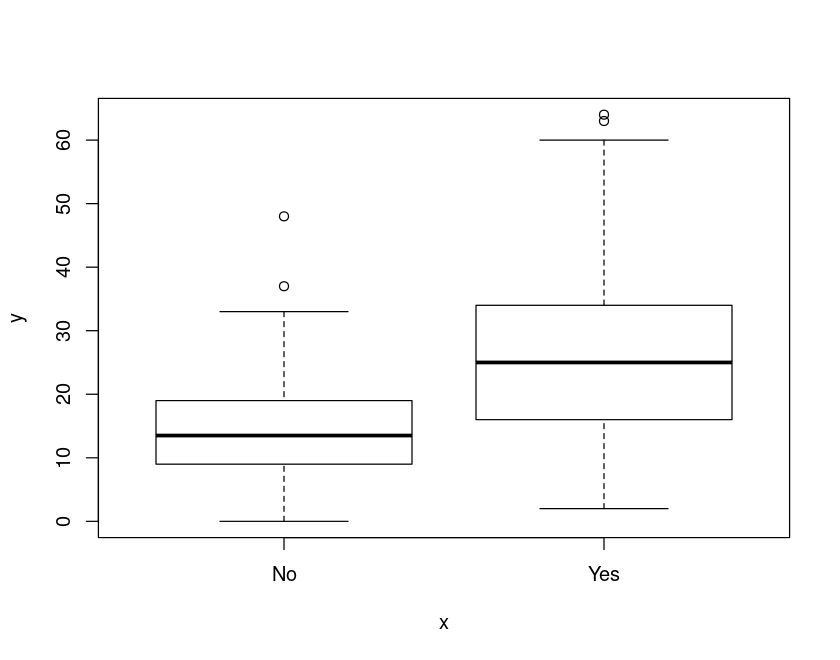

In [20]:
plot(college$Private, college$perc.alumni)

> Private colleges have higher percentage of alumni who donate.

Check the relationship between College type and Estimates Personal Spending

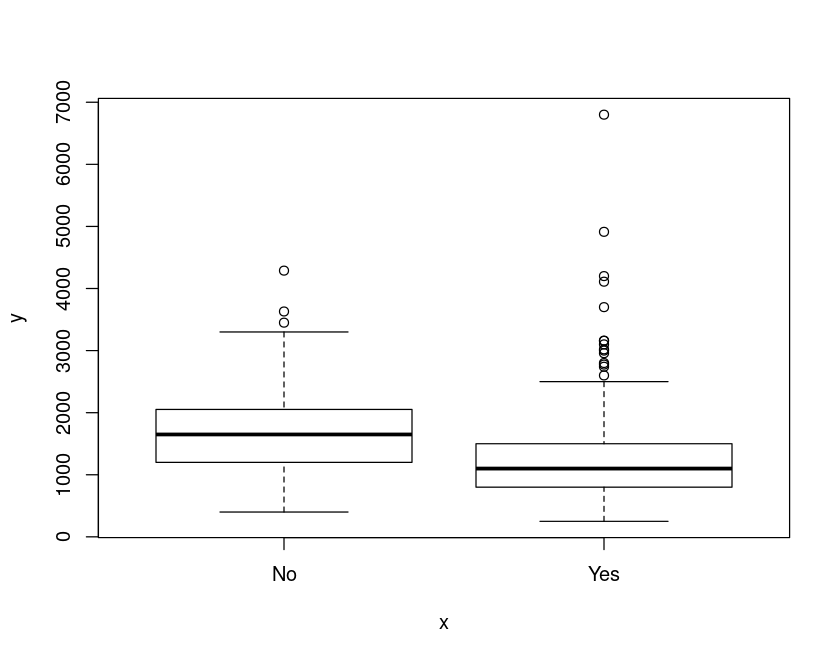

In [21]:
plot(college$Private, college$Personal)

> Private colleges have a lower estimated personal spending.

Check the relationship between College type and its Elite status

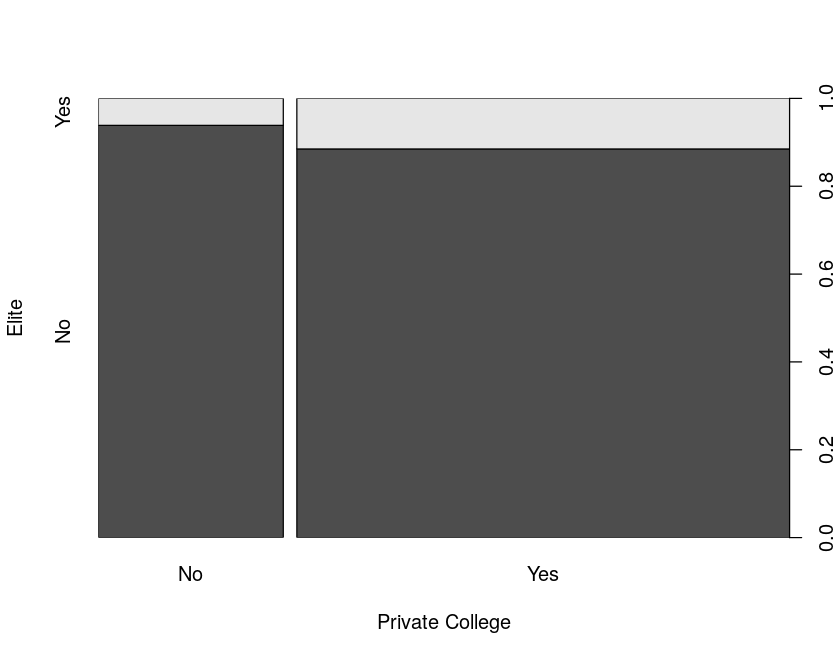

In [22]:
plot(college$Private, college$Elite, xlab='Private College', ylab='Elite')

> Percentage of Private colleges that have Elite status is almost twice than that of Public colleges.

Check the relationship between A College's Elite status and its Instuctional Expenditure per student

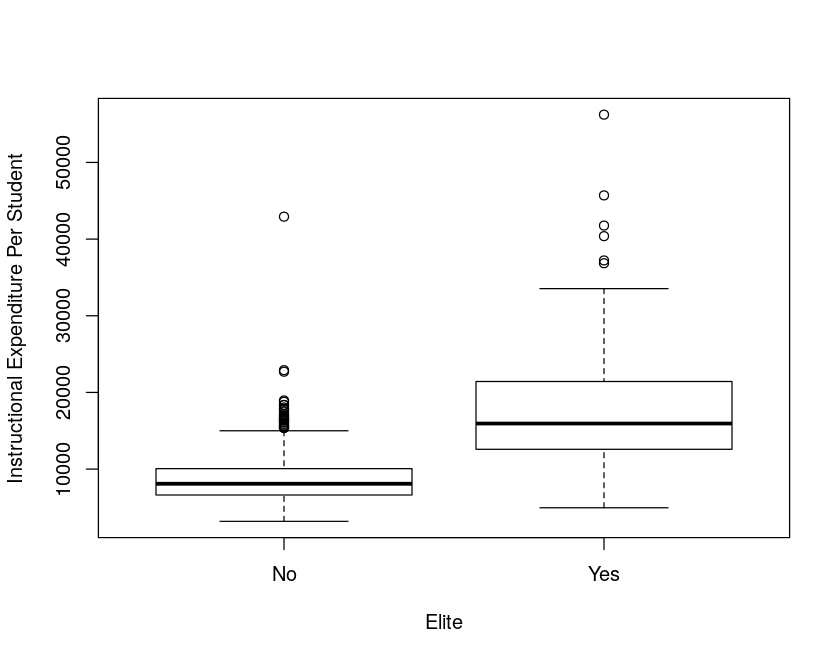

In [23]:
plot(college$Elite, college$Expend, xlab='Elite', ylab='Instructional Expenditure Per Student')

> Elite colleges have a high instructional expenditure per student.

---

## Summary

- Number of applications received in public colleges is very large as compared to private colleges.
- Number of students enrolled in public colleges is very large as compared to private colleges.
- The reason that the number of enrollments in public colleges is very large as compared to private colleges is that public colleges receive a large number of applications.
- A higher Top-10-percent rate always ensures a higher graduation rate.
- Private college have a better Student-Faculty ratio.
- Private colleges have a better graduation rate.
- Public colleges have a slightly more percentage of Faculty with Ph.Ds
- Although public colleges have a higher percentage of faculty with Ph.Ds, the graduation rate for private colleges is higher. The reason for this could be the fact that private colleges have a better student-faculty ratio.
- Private colleges have higher percentage of alumni who donate.
- Private colleges have a lower estimated personal spending.
- Percentage of Private colleges that have Elite status is almost twice than that of Public colleges.
- Elite colleges have a high instructional expenditure per student.